# K-Armed Bandit Simulation Testing

The purpose of this notebook is to explore the k-armed bandit problem. 

The k-armed bandit problem is simply the idea that we have k possible bandits, or generators. A common analogy is to think of the bandits as being slot machines. The bandits individually follow seperate distributions, which corresponds to each of the slot machines having seperate chances of paying out. 

If given n possible turns, the best choice would be to pick the bandit that has the highest expected value. In this simulation, the bandits are generating from a normal distribution. Therefore, the goal should be to pick the bandit with the highest mean. However, there is no way of knowing the means of each of the bandits without generator from each of them.

A simple algorithm would be to use k of the n turns to generate a value from each bandit. Then, the bandit with the highest mean, you declare that to be the best option, and just use the (n - k) remaining turns picking that bandit. However, this ignores the randomness of the value generation. For example, a suboptimal bandit may have been chosen, causing the person to keep making suboptimal choices for the rest of the simulation.

Therefore, if the goal is to make the most money from the slot machines in n turns, the more nuanced solution would be to mostly pick the bandit (slot machine) that you think is the best, but also try out the other slot machines to avoid making suboptimal choices.

This problem represents a large-scale issue within reinforcement learning of balancing exploitation and exploration in the learning progress of an agent. If given no information of the environment, the agent should explore randomly to learn as much as it can. However, if only focusing on exploration, there is a computational inefficiently of exploring useless choices. Therefore, there must be a balance forged between exploration and making the predicted optimal choice (exploitation).

In [1]:
from k_armed_bandits import create_model, simulation_e_greedy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d, Axes3D
from pandas.plotting import scatter_matrix

## Basic Simultion of K-armed bandit problem

The algorithm used is fairly simple. If given k bandits, we keep track of a running average of each of the bandits. Then, you pick the bandit with the highest average.

In [3]:
np.random.seed(1)

In [4]:
k = 10
max_sd = 10
min_mean = 5
max_mean = 30

In [5]:
ground_truth = create_model(k, max_sd, min_mean, max_mean)

In [6]:
policy = np.zeros(k)

epsilon = 0
n = 1000
step_size = 1
c = 0

In [7]:
iterations = 1000

In [8]:
rewards = []
for i in range(iterations):
    if (((i + 1) % 100) == 0):
        print("{} iterations finished".format(str(i + 1)))
    counts, choices, policy, total_reward = simulation_e_greedy(ground_truth, 
                                                                policy, 
                                                                epsilon,
                                                                n,
                                                                k,
                                                                step_size,
                                                               c)
    rewards.append(total_reward)

100 iterations finished
200 iterations finished
300 iterations finished
400 iterations finished
500 iterations finished
600 iterations finished
700 iterations finished
800 iterations finished
900 iterations finished
1000 iterations finished


Mean Reward: 10000.858589979798


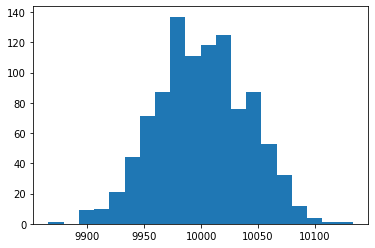

In [9]:
plt.hist(rewards, bins = 20)
print("Mean Reward: {}".format(np.mean(rewards)))
plt.show()

This shows that if you simply pick the a bandit at random and continue, then the reward averages out to about 1000.

## Testing out Number of Bandits

In this experiment, we are using the a simple e-greedy algorithm with the e parameter @ 0.1

In [10]:
k = 10
max_sd = 10
min_mean = 5
max_mean = 30

In [11]:
k_values = range(2,100)

In [12]:
policy = np.zeros(k)

epsilon = 0.1
n = 1000
step_size = 1
c = 0
iterations = 100

In [13]:
results = []
for k in k_values:
    print("k value: {}".format(k))
    policy = np.zeros(k)
    ground_truth = create_model(k, max_sd, min_mean, max_mean)
    rewards = []
    for i in range(iterations):
        result = simulation_e_greedy(ground_truth,policy,epsilon,
                                     n, k, step_size,c)
        rewards.append(result[3])
    results.append(np.mean(rewards))

k value: 2
k value: 3
k value: 4
k value: 5
k value: 6
k value: 7
k value: 8
k value: 9
k value: 10
k value: 11
k value: 12
k value: 13
k value: 14
k value: 15
k value: 16
k value: 17
k value: 18
k value: 19
k value: 20
k value: 21
k value: 22
k value: 23
k value: 24
k value: 25
k value: 26
k value: 27
k value: 28
k value: 29
k value: 30
k value: 31
k value: 32
k value: 33
k value: 34
k value: 35
k value: 36
k value: 37
k value: 38
k value: 39
k value: 40
k value: 41
k value: 42
k value: 43
k value: 44
k value: 45
k value: 46
k value: 47
k value: 48
k value: 49
k value: 50
k value: 51
k value: 52
k value: 53
k value: 54
k value: 55
k value: 56
k value: 57
k value: 58
k value: 59
k value: 60
k value: 61
k value: 62
k value: 63
k value: 64
k value: 65
k value: 66
k value: 67
k value: 68
k value: 69
k value: 70
k value: 71
k value: 72
k value: 73
k value: 74
k value: 75
k value: 76
k value: 77
k value: 78
k value: 79
k value: 80
k value: 81
k value: 82
k value: 83
k value: 84
k value: 85


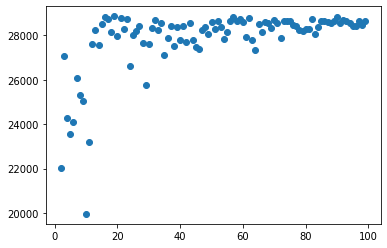

In [14]:
plt.scatter(x = k_values, y = results)
plt.show()

This shows that when there isn't enough bandits, there's likely less chance of drawing a bandit with a high mean. However, the average reward tends to level out after about 30-40 bandits.

Therefore, for the rest of the experiments, I'm going to use 60 bandits for the experimentation.

## Testing out Role of Variation

In [15]:
k = 60
max_sd = 10
min_mean = 5
max_mean = 30

In [16]:
policy = np.zeros(k)

epsilon = 0.1
n = 1000
step_size = 1
c = 0
iterations = 20

In [17]:
max_sd_range = list(range(1,20))

In [18]:
epsilon_range = np.arange(0,1.1,0.1)

In [19]:
results = pd.DataFrame(columns=["max_sd", "epsilon", "average reward"])

for epsilon in epsilon_range:
    print("epsilon values: {}".format(epsilon))
    for max_sd in max_sd_range:
        policy = np.zeros(k)
        ground_truth = create_model(k, max_sd, min_mean, max_mean)
        rewards = []
        for i in range(iterations):
            result = simulation_e_greedy(ground_truth,policy,epsilon,
                                         n, k, step_size,c)
            rewards.append(result[3])
        stats = [max_sd, epsilon, np.mean(rewards)]
        results.loc[len(results)] = stats

epsilon values: 0.0
epsilon values: 0.1
epsilon values: 0.2
epsilon values: 0.30000000000000004
epsilon values: 0.4
epsilon values: 0.5
epsilon values: 0.6000000000000001
epsilon values: 0.7000000000000001
epsilon values: 0.8
epsilon values: 0.9
epsilon values: 1.0


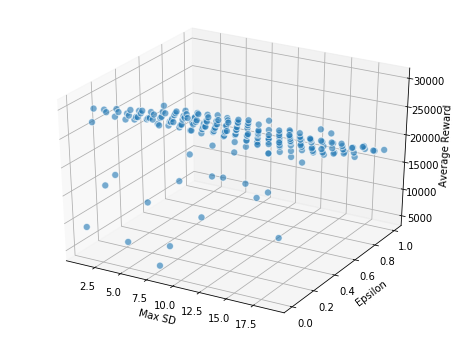

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = results['max_sd']
ys = results['epsilon']
zs = results['average reward']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Max SD')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Average Reward')

plt.show()

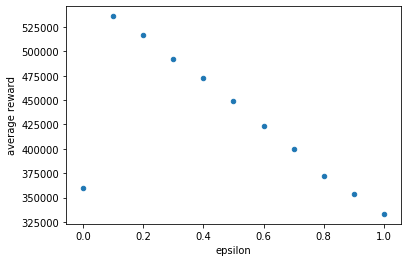

In [21]:
ax = results.groupby('epsilon', as_index= False)['average reward'].sum().plot.scatter("epsilon", "average reward")

This shows that the reward is improved by a small epsilon value improvement, but it gets hurt by a high epsilon value. This indicates that some exploration is good, but too much is bad.

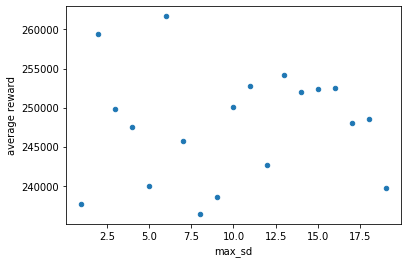

In [22]:
ax = results.groupby('max_sd', as_index= False)['average reward'].sum().plot.scatter("max_sd", "average reward")

This shows that in aggregate, there is not an indentifiable relationship between reward and variance.

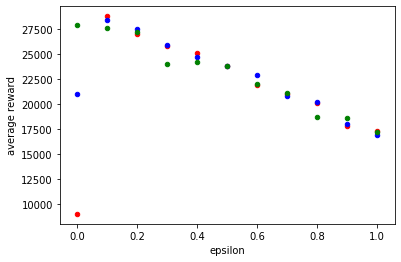

In [23]:
ax = results[results['max_sd'] == 1].plot.scatter(x = "epsilon", y = "average reward", c = "red")
results[results['max_sd'] == 10].plot.scatter(x = "epsilon", y = "average reward", c = "blue", ax = ax)
results[results['max_sd'] == 15].plot.scatter(x = "epsilon", y = "average reward", c = "green", ax = ax)
plt.show()

This demonstrated that there is a common relationship between highly variable and low variable generators.

## Testing Different epsilon parameter in epsilon-greedy algorithm

In [24]:
n = 1000
step_size = 1
c = 0

In [25]:
epsilon_range = np.arange(0,1.1,0.1)
iterations = 100

In [26]:
results = []
for epsilon in epsilon_range:
    print("epsilon values: {}".format(epsilon))
    rewards = []
    for i in range(iterations):
        policy = np.zeros(k)
        ground_truth = create_model(k, max_sd, min_mean, max_mean)
        result = simulation_e_greedy(ground_truth,policy,epsilon,
                                     n, k, step_size,c)
        rewards.append(result[3])
    results.append(np.mean(rewards))

epsilon values: 0.0
epsilon values: 0.1
epsilon values: 0.2
epsilon values: 0.30000000000000004
epsilon values: 0.4
epsilon values: 0.5
epsilon values: 0.6000000000000001
epsilon values: 0.7000000000000001
epsilon values: 0.8
epsilon values: 0.9
epsilon values: 1.0


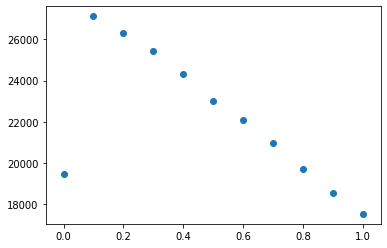

In [27]:
plt.scatter(x = epsilon_range, y = results)

This shows there is a large jump with an epsilon value between [0,0.1].

## Attempting to Find Optimal Epsilon Value

In [28]:
n = 1000
step_size = 1
c = 0

In [29]:
epsilon_range = np.arange(0,0.31,0.01)
iterations = 100

In [30]:
results = []
for epsilon in epsilon_range:
    print("epsilon values: {}".format(epsilon))
    rewards = []
    for i in range(iterations):
        policy = np.zeros(k)
        ground_truth = create_model(k, max_sd, min_mean, max_mean)
        result = simulation_e_greedy(ground_truth,policy,epsilon,
                                     n, k, step_size,c)
        rewards.append(result[3])
    results.append(np.mean(rewards))

epsilon values: 0.0
epsilon values: 0.01
epsilon values: 0.02
epsilon values: 0.03
epsilon values: 0.04
epsilon values: 0.05
epsilon values: 0.06
epsilon values: 0.07
epsilon values: 0.08
epsilon values: 0.09
epsilon values: 0.1
epsilon values: 0.11
epsilon values: 0.12
epsilon values: 0.13
epsilon values: 0.14
epsilon values: 0.15
epsilon values: 0.16
epsilon values: 0.17
epsilon values: 0.18
epsilon values: 0.19
epsilon values: 0.2
epsilon values: 0.21
epsilon values: 0.22
epsilon values: 0.23
epsilon values: 0.24
epsilon values: 0.25
epsilon values: 0.26
epsilon values: 0.27
epsilon values: 0.28
epsilon values: 0.29
epsilon values: 0.3


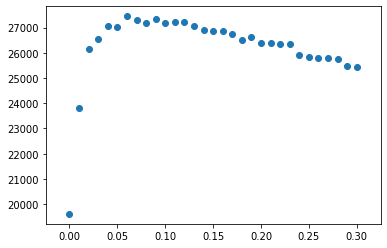

In [31]:
plt.scatter(x = epsilon_range, y = results)
plt.show()

This seems to indicate that an epsilon value between 0.05 and 0.15 is likely a good choice.

## Testing Optimisitic Initial Value

In [32]:
k = 60
max_sd = 10
min_mean = 5
max_mean = 30
iterations = 100

In [33]:
ground_truth = create_model(k, max_sd, min_mean, max_mean)

In [34]:
n = 1000
step_size = 1
c = 0

epsilon_range = np.arange(0,0.21,0.01)

results1 = []
for epsilon in epsilon_range:
    print("epsilon values: {}".format(epsilon))
    rewards = []
    for i in range(iterations):
        policy = np.zeros(k)
        result = simulation_e_greedy(ground_truth,policy,epsilon,
                                     n, k, step_size,c)
        rewards.append(result[3])
    results1.append(np.mean(rewards))

epsilon values: 0.0
epsilon values: 0.01
epsilon values: 0.02
epsilon values: 0.03
epsilon values: 0.04
epsilon values: 0.05
epsilon values: 0.06
epsilon values: 0.07
epsilon values: 0.08
epsilon values: 0.09
epsilon values: 0.1
epsilon values: 0.11
epsilon values: 0.12
epsilon values: 0.13
epsilon values: 0.14
epsilon values: 0.15
epsilon values: 0.16
epsilon values: 0.17
epsilon values: 0.18
epsilon values: 0.19
epsilon values: 0.2


In [35]:
n = 1000
step_size = 1
c = 0

epsilon_range = np.arange(0,0.21,0.01)

results2 = []
for epsilon in epsilon_range:
    print("epsilon values: {}".format(epsilon))
    rewards = []
    for i in range(iterations):
        policy = np.zeros(k)
        policy.fill(5)
        result = simulation_e_greedy(ground_truth,policy,epsilon,
                                     n, k, step_size,c)
        rewards.append(result[3])
    results2.append(np.mean(rewards))

epsilon values: 0.0
epsilon values: 0.01
epsilon values: 0.02
epsilon values: 0.03
epsilon values: 0.04
epsilon values: 0.05
epsilon values: 0.06
epsilon values: 0.07
epsilon values: 0.08
epsilon values: 0.09
epsilon values: 0.1
epsilon values: 0.11
epsilon values: 0.12
epsilon values: 0.13
epsilon values: 0.14
epsilon values: 0.15
epsilon values: 0.16
epsilon values: 0.17
epsilon values: 0.18
epsilon values: 0.19
epsilon values: 0.2


In [36]:
n = 1000
step_size = 1
c = 0

epsilon_range = np.arange(0,0.21,0.01)

results3 = []
for epsilon in epsilon_range:
    print("epsilon values: {}".format(epsilon))
    rewards = []
    for i in range(iterations):
        policy = np.zeros(k)
        policy.fill(10)
        result = simulation_e_greedy(ground_truth,policy,epsilon,
                                     n, k, step_size,c)
        rewards.append(result[3])
    results3.append(np.mean(rewards))

epsilon values: 0.0
epsilon values: 0.01
epsilon values: 0.02
epsilon values: 0.03
epsilon values: 0.04
epsilon values: 0.05
epsilon values: 0.06
epsilon values: 0.07
epsilon values: 0.08
epsilon values: 0.09
epsilon values: 0.1
epsilon values: 0.11
epsilon values: 0.12
epsilon values: 0.13
epsilon values: 0.14
epsilon values: 0.15
epsilon values: 0.16
epsilon values: 0.17
epsilon values: 0.18
epsilon values: 0.19
epsilon values: 0.2


In [37]:
n = 1000
step_size = 1
c = 0

epsilon_range = np.arange(0,0.21,0.01)

results4 = []
for epsilon in epsilon_range:
    print("epsilon values: {}".format(epsilon))
    rewards = []
    for i in range(iterations):
        policy = np.zeros(k)
        policy.fill(30)
        result = simulation_e_greedy(ground_truth,policy,epsilon,
                                     n, k, step_size,c)
        rewards.append(result[3])
    results4.append(np.mean(rewards))

epsilon values: 0.0
epsilon values: 0.01
epsilon values: 0.02
epsilon values: 0.03
epsilon values: 0.04
epsilon values: 0.05
epsilon values: 0.06
epsilon values: 0.07
epsilon values: 0.08
epsilon values: 0.09
epsilon values: 0.1
epsilon values: 0.11
epsilon values: 0.12
epsilon values: 0.13
epsilon values: 0.14
epsilon values: 0.15
epsilon values: 0.16
epsilon values: 0.17
epsilon values: 0.18
epsilon values: 0.19
epsilon values: 0.2


In [38]:
n = 1000
step_size = 1
c = 0

epsilon_range = np.arange(0,0.21,0.01)

results5 = []
for epsilon in epsilon_range:
    print("epsilon values: {}".format(epsilon))
    rewards = []
    for i in range(iterations):
        policy = np.zeros(k)
        policy.fill(50)
        result = simulation_e_greedy(ground_truth,policy,epsilon,
                                     n, k, step_size,c)
        rewards.append(result[3])
    results5.append(np.mean(rewards))

epsilon values: 0.0
epsilon values: 0.01
epsilon values: 0.02
epsilon values: 0.03
epsilon values: 0.04
epsilon values: 0.05
epsilon values: 0.06
epsilon values: 0.07
epsilon values: 0.08
epsilon values: 0.09
epsilon values: 0.1
epsilon values: 0.11
epsilon values: 0.12
epsilon values: 0.13
epsilon values: 0.14
epsilon values: 0.15
epsilon values: 0.16
epsilon values: 0.17
epsilon values: 0.18
epsilon values: 0.19
epsilon values: 0.2


In [39]:
df = pd.DataFrame(columns=['t1', 't2'])
df['t1'] = results1
df['t2'] = results2
df['t3'] = results3
df['t4'] = results4
df['t5'] = results5
df['epsilon'] = epsilon_range

In [40]:
df.head()

,t1,t2,t3,t4,t5,epsilon
0,19009.631971,18919.098656,18920.403983,29274.903749,29232.041960,0.00
1,25242.921991,25574.611593,25573.143732,29177.936395,29135.049349,0.01
2,27015.544426,26964.502251,26836.872208,29064.165044,28993.466211,0.02
3,27630.276464,27623.703615,27874.943167,28910.831767,28919.436539,0.03
4,27898.977370,27960.203283,28172.523044,28827.399099,28795.335255,0.04


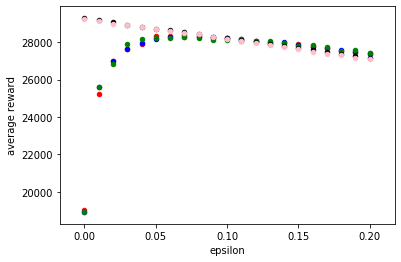

In [48]:
ax = df.plot.scatter(x = "epsilon", y = "t1", c = "red")
df.plot.scatter(x = "epsilon", y = "t2", c = "blue", ax = ax)
df.plot.scatter(x = "epsilon", y = "t3", c = "green", ax = ax)
df.plot.scatter(x = "epsilon", y = "t4", c = "black", ax = ax)
df.plot.scatter(x = "epsilon", y = "t5", c = "pink", ax = ax)
plt.ylabel("average reward")
plt.show()

This shows that there is an exploration inherent in applying an optimistic initialization of the policy. 

The goal of this task is to find the best bandit earlier on rather than applying randomness for the whole process. It seems that the optimistic initialization causes exploration in the earlier steps, which allows us to have high amounts of exploitation later in the steps.

This shows that optimistic initialization is a better option than e-greedy policy update methods.

## Upper-Confidence Bound Action Modification

In [42]:
k = 60
max_sd = 10
min_mean = 5
max_mean = 30
iterations = 200

In [43]:
n = 1000
step_size = 1
c = 0
epsilon = 0.0

ground_truth = create_model(k, max_sd, min_mean, max_mean)

In [44]:
c_range = np.arange(0, 2.1, 0.1)

In [45]:
results = []
for c in c_range:
    print("c parameter value: {}".format(c))
    rewards = []
    for i in range(iterations):
        policy = np.zeros(k)
        policy.fill(50)
        result = simulation_e_greedy(ground_truth,policy,epsilon,
                                     n, k, step_size,c)
        rewards.append(result[3])
    results.append(np.mean(rewards))

c parameter value: 0.0
c parameter value: 0.1
c parameter value: 0.2
c parameter value: 0.30000000000000004
c parameter value: 0.4
c parameter value: 0.5
c parameter value: 0.6000000000000001
c parameter value: 0.7000000000000001
c parameter value: 0.8
c parameter value: 0.9
c parameter value: 1.0
c parameter value: 1.1
c parameter value: 1.2000000000000002
c parameter value: 1.3
c parameter value: 1.4000000000000001
c parameter value: 1.5
c parameter value: 1.6
c parameter value: 1.7000000000000002
c parameter value: 1.8
c parameter value: 1.9000000000000001
c parameter value: 2.0


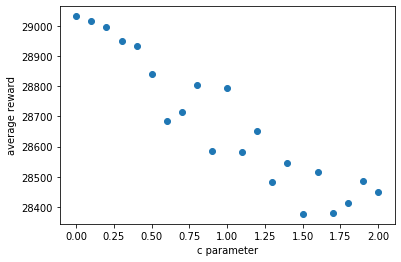

In [47]:
plt.scatter(x = c_range, y = results)
plt.xlabel("c parameter")
plt.ylabel("average reward")
plt.show()

This shows that when using the optimistic initialization, the upper-confidence bound actions is not neccessary.